In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, odeint
import scipy.constants as c

from config import model
import g_star

$$
 \frac{\mathrm{d} t}{\mathrm{d} T}  = - M_\mathrm{pl} \sqrt{\frac{45}{64 \pi^3}} \frac{1}{T^3 g_s(T) \sqrt{g_\rho(T)}} (T g_\rho'(T) + 4 g_\rho(T))
$$

$$
\Rightarrow t(T) = t_0 + \int^T_{T(t = t_0)} \frac{\mathrm{d} t}{\mathrm{d} T} \mathrm{d} T
$$

$$
\frac{\mathrm{d} t}{\mathrm{d} T} \sim \frac{ 14 \cdot 10^{9} \mathrm{yr} }{ 10^{12} \mathrm{K} }
$$

In [2]:
def dtdT(T, g_model=g_star.borsamyi_paper_table):
    return (
        # this is in 1/eV / eV = eV^-2
        - model.M_pl * np.sqrt(45 / (64 * np.pi**3)) * 
        1 / (T**3 * g_model.g_s(T) * np.sqrt(g_model.g_rho(T))) *
        (T*g_model.g_rho_diff(T) + 4*g_model.g_rho(T))
    )

In [3]:
ans = t, t_err = quad(dtdT, 100e6, 100e3) 

np.array(ans) / c.elementary_charge * c.hbar

array([  1.48051968e+01,   1.89173419e-07])

In [7]:
def plot_temp_evo(g_model):
    T = np.logspace(5, np.log10(np.max(g_star.T)), 400)[::-1]
    t0 = 0 # 1e-13 * c.sc.elementary_charge / c.sc.hbar

    t = odeint(lambda t, T: dtdT(T, g_model=g_model), t0, T)

    T_in_K = T * c.elementary_charge / c.Boltzmann 
    t_in_s = t / c.elementary_charge * c.hbar

    fig, ax1 = plt.subplots()
    ax1.loglog(t_in_s, T / 1e6)
    ax2 = ax1.twinx()
    ax1.set_ylabel("T [MeV]")
    ax1.set_xlabel("t [s]")
    ax2.set_ylabel("T [K]", rotation=-90, labelpad=18)
    ax2.set_ylim(np.min(T_in_K), np.max(T_in_K))
    ax2.set_yscale("log")
    ax1.grid()
    # ax1.set_title("Temperature of the hot universe")

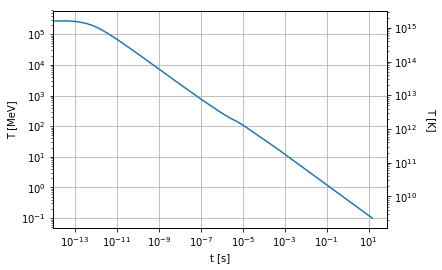

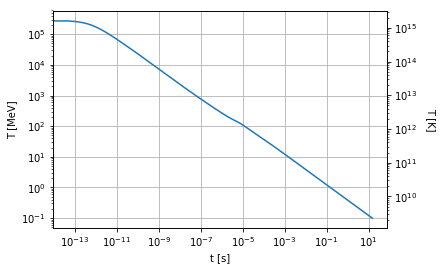

In [8]:
# looks good
plot_temp_evo(g_star.borsamyi_paper_table)
plot_temp_evo(g_star.borsamyi_table)

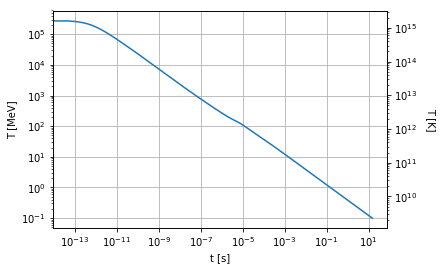

In [9]:
plot_temp_evo(g_star.borsamyi_table)
plt.savefig("Plots/T_of_t_plot.pdf")